# TeamsCode MIHS Programming Contest Registration Data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load in Excel data and assign contest label to each row
df = pd.DataFrame()
df = df.append(pd.read_excel('TeamsCode_Registration_Data/MIHS/Spring_2017_MIHS_Registration.xlsx', na_filter=False))
df['Contest'] = 'Spring2017'
df = df.append(pd.read_excel('TeamsCode_Registration_Data/MIHS/Fall_2017_MIHS_Registration.xlsx', na_filter=False))
df.loc[df['Contest'].isnull(),'Contest'] = 'Fall2017'
df = df.append(pd.read_excel('TeamsCode_Registration_Data/MIHS/Spring_2018_MIHS_Registration.xlsx', na_filter=False))
df.loc[df['Contest'].isnull(),'Contest'] = 'Spring2018'
df = df.append(pd.read_excel('TeamsCode_Registration_Data/MIHS/Fall_2018_MIHS_Registration.xlsx', na_filter=False))
df.loc[df['Contest'].isnull(),'Contest'] = 'Fall2018'
df = df.append(pd.read_excel('TeamsCode_Registration_Data/MIHS/Spring_2019_MIHS_Registration.xlsx', na_filter=False))
df.loc[df['Contest'].isnull(),'Contest'] = 'Spring2019'

contest_categories = ['Spring2017', 'Fall2017', 'Spring2018', 'Fall2018', 'Spring2019']
df['Contest'] = df['Contest'].astype(pd.api.types.CategoricalDtype(categories=contest_categories))

#### Preview of data:

In [3]:
df.head()

,Contest,Division,Language,Name,School,Size
0,Spring2017,Advanced,Java,JJKings,Mercer Island High School,3
1,Spring2017,Advanced,C#,Blue Noun,Mercer Island High School,1
2,Spring2017,Advanced,Java,The Flat Earth Society,Mercer Island High School,3
3,Spring2017,Advanced,Python,Dystopic Dynausaurs,Tesla STEM High School,3
4,Spring2017,Advanced,C#,Failures,Mercer Island High School,3


#### Total number of teams:

In [4]:
df['Size'].count()

255

#### Total number of participants:

In [5]:
df['Size'].sum()

588

#### Average team size:

In [6]:
df['Size'].mean()

2.3058823529411763

#### Team size distribution:

In [7]:
sizes = df.groupby('Size').size().sort_values(ascending=False)
sizes

Size
3    134
2     65
1     56
dtype: int64

Text(0.5,1,'Team Size')

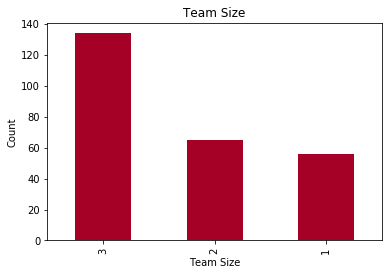

In [8]:
sizes_ax = sizes.plot.bar(colormap='RdYlBu')
sizes_ax.set_xlabel('Team Size')
sizes_ax.set_ylabel('Count')
sizes_ax.set_title('Team Size')

#### Programming languages:

In [9]:
languages = df.groupby('Language').size().sort_values(ascending=False)
languages

Language
Java      183
Python     55
C#         12
C++         4
Kotlin      1
dtype: int64

Text(0.5,1,'Programming Languages')

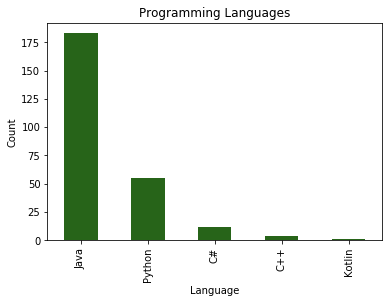

In [10]:
languages_ax = languages.plot.bar(colormap='PiYG_r')
languages_ax.set_xlabel('Language')
languages_ax.set_ylabel('Count')
languages_ax.set_title('Programming Languages')

#### Divisions:

In [11]:
divisions = df.groupby('Division').size().sort_values(ascending=False)
divisions

Division
Intermediate    163
Advanced         92
dtype: int64

Text(0.5,1,'Division')

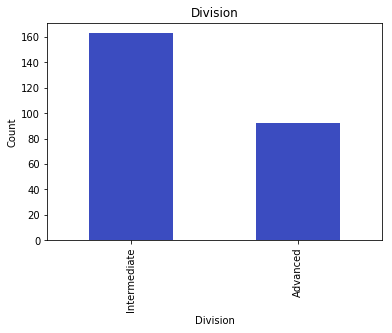

In [12]:
divisions_ax = divisions.plot.bar(colormap='coolwarm')
divisions_ax.set_xlabel('Division')
divisions_ax.set_ylabel('Count')
divisions_ax.set_title('Division')

#### Top represented schools:

In [13]:
schools = df.groupby('School').size().sort_values(ascending=False)
schools.head(15)

School
Issaquah High School           36
Bellevue High School           27
Newport High School            24
Interlake High School          19
Mercer Island High School      14
Tesla STEM High School         14
Garfield High School           12
Odle Middle School             11
Lakeside School                 8
Skyline High School             7
Bishop Blanchet High School     7
Islander Middle School          5
Prime Factor School             4
Eastside Preparatory School     3
Tyee Middle School              3
dtype: int64

#### Preview of other schools:

In [14]:
schools.tail(10)

School
Lakeside Middle School                                 1
Interlake High School, Odle Middle School              1
Lake Oswego High School                                1
Issaquah Middle School, Issaquah High School           1
Issaquah High School, Pacific Cascade Middle School    1
Prime Factor Math Circle                               1
Redmond Middle School                                  1
International Community School                         1
Interlake High School, Tesla STEM High School          1
Woodinville High School                                1
dtype: int64

#### Number of unique schools:

In [15]:
# Filters out strings that contain two schools
schools.count() - sum(schools.index.str.contains(','))

54

Text(0.5,1,'Division')

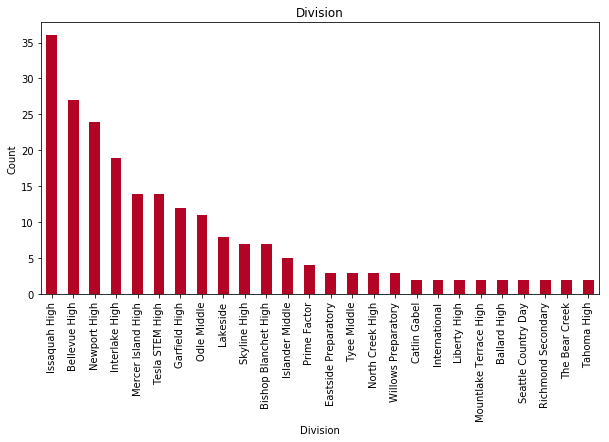

In [16]:
# Get top schools and strip "School" from the end of each name
top_schools = schools[schools > 1]
top_schools.index = top_schools.index.map(lambda x: str(x)[:-7])

schools_ax = top_schools.plot.bar(colormap='coolwarm_r', figsize=(10, 5))
schools_ax.set_xlabel('Division')
schools_ax.set_ylabel('Count')
schools_ax.set_title('Division')

#### Teams that signed up for two or more contests (under the same name):

In [17]:
names = df.groupby('Name').size().sort_values(ascending=False)
names[names > 1]

Name
Dorper             3
Naomi              3
The Letter 3       2
ProPals            2
FIRECRACKERS       2
Delete System32    2
Twinkie            2
Stemmies           2
MTHS Hacks         2
Nieracol           2
1337               2
dtype: int64

#### Turnout at each contest:

In [18]:
contests = df.groupby('Contest')
contests['Size'].sum()

Contest
Spring2017    104
Fall2017       96
Spring2018     93
Fall2018      153
Spring2019    142
Name: Size, dtype: int64

Text(0.5,1,'Contest Turnout')

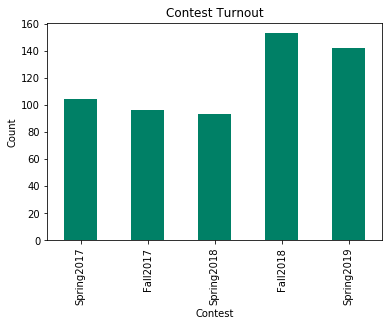

In [19]:
contests_ax = contests['Size'].sum().plot.bar(colormap='summer')
contests_ax.set_xlabel('Contest')
contests_ax.set_ylabel('Count')
contests_ax.set_title('Contest Turnout')